<a href="https://colab.research.google.com/github/ms0753/Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
student_data = pd.read_table('/content/students_area_detail.csv',sep=',')
student_data.head()

,lecture_id,area,latitude,longitude,user_id
0,5f2cfa581c0c783e4e825379,부산,35.179554,129.075642,78ff837c7cea9f33
1,5f35370cf9b9ed3dee7f1b73,대전,36.348315,127.390594,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c1464,서울,37.487935,126.857758,23182525e9996864
3,5f35370cf9b9ed3dee7f1b6a,부산,35.179554,129.075642,ffb6913842d617a5
4,5f266927e67b8fcf4340c1705,서울,37.487935,126.857758,2c6822e7e833dc95


In [2]:
category_range = set(student_data['area'])
print(category_range, len(category_range))

{'광주', '전북', '경남', '제주', '충북', '경기', '세종', '부산', '경북', '대전', '강원', '서울'} 12


In [3]:
area_info = student_data[['area', 'latitude', 'longitude']]
area_info.head()

,area,latitude,longitude
0,부산,35.179554,129.075642
1,대전,36.348315,127.390594
2,서울,37.487935,126.857758
3,부산,35.179554,129.075642
4,서울,37.487935,126.857758


In [4]:
area_info = area_info.drop_duplicates(['area'])
area_info = area_info.reset_index()
area_info

,index,area,latitude,longitude
0,0,부산,35.179554,129.075642
1,1,대전,36.348315,127.390594
2,2,서울,37.487935,126.857758
3,5,전북,35.574683,126.852264
4,11,광주,36.084621,126.951141
5,13,경기,37.546755,127.203827
6,36,강원,37.531510,129.000000
7,41,세종,36.560000,127.278000
8,53,경북,36.129002,128.343658
9,59,경남,35.556809,129.247284


In [5]:
area_info = area_info.sort_values(by=["area"], ascending=[True])
area_info

,index,area,latitude,longitude
6,36,강원,37.531510,129.000000
5,13,경기,37.546755,127.203827
9,59,경남,35.556809,129.247284
8,53,경북,36.129002,128.343658
4,11,광주,36.084621,126.951141
1,1,대전,36.348315,127.390594
0,0,부산,35.179554,129.075642
2,2,서울,37.487935,126.857758
7,41,세종,36.560000,127.278000
3,5,전북,35.574683,126.852264


In [6]:
number_of_students = pd.DataFrame(student_data.groupby('area')['user_id'].count())
number_of_students

,user_id
area,
강원,261
경기,804
경남,79
경북,85
광주,565
대전,1238
부산,1162
서울,5296
세종,446


In [7]:
result = pd.merge(area_info, number_of_students, on = "area")
result

,index,area,latitude,longitude,user_id
0,36,강원,37.531510,129.000000,261
1,13,경기,37.546755,127.203827,804
2,59,경남,35.556809,129.247284,79
3,53,경북,36.129002,128.343658,85
4,11,광주,36.084621,126.951141,565
5,1,대전,36.348315,127.390594,1238
6,0,부산,35.179554,129.075642,1162
7,2,서울,37.487935,126.857758,5296
8,41,세종,36.560000,127.278000,446
9,5,전북,35.574683,126.852264,160


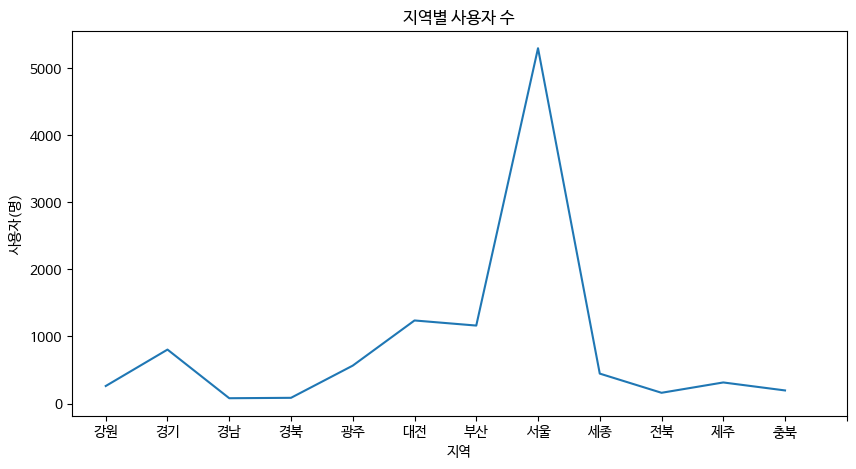

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumBarunGothic') # 한글 깨짐 방지

plt.figure(figsize=(10,5))
plt.plot(result['area'], result['user_id'])
plt.title('지역별 사용자 수')
plt.xlabel('지역')
plt.ylabel('사용자(명)')
plt.xticks(np.arange(13))
plt.show()

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [10]:
import folium
from folium.plugins import MarkerCluster

In [11]:
m = folium.Map(location=[37.5536067, 126.9674308], zoom_start = 11)
m

In [12]:
for n in result.index:
  radius = result.loc[n, 'user_id']
  folium.CircleMarker([result['latitude'][n], result['longitude'][n]],
                      radius = radius/50, fill=True).add_to(m)
m